## I. Manual Differentiation

Let's define a very simple function
$f(x) = 3x^{3} - 5x^{2}$


Derivative of func:
$f(x) = 9x^{2} - 10x$


In [ ]:
#In Python code:
def func(x):
    return 3 * x ** 3 - 5 * x ** 2

def func_der(x):
    return 9 * x ** 2 - 10 * x

In [ ]:
func_der(1.5)

5.25

$$f(x) = sin(tan(x)^{cos(x)}cos(x)^{tan(x)} )$$

$$f'(x)?$$

SoftRelu$$log(1+e^{wx+b})$$


After 2 layer, derivative become ...
$$\frac{e^{b_1+b_2+w_1x+w_2log(1+e^b_1+w_1x)}w_{2}x)}{(1+e^{b_1+w_1x})(1+e^{b_2+w2log(1+e^{b_1+w1x})})}$$

Next layer?

So on...

# II. Numberical Differentiation

$$f'(x) = \lim_{\varepsilon \rightarrow 0}\frac{f(x+\varepsilon) - f(x)}{\varepsilon}$$

Tránh đạo hàm tại x không xác định, nên sử dụng công thức dưới:

$$f'(x) = \lim_{\varepsilon \rightarrow 0}\frac{f(x+\varepsilon/2) - f(x-\varepsilon/2)}{\varepsilon}$$

In [ ]:
def gradient(f, x, epsilon=1.0e-13):
    return (f(x + epsilon/2)
            - f(x - epsilon/2))/epsilon

In [ ]:
from math import sin, tan, cos

def ff(x):
    return sin(tan(x)**cos(x) * cos(x)**tan(x))

In [ ]:
gradient(ff, 1.0)

-1.5987211554602254

---

$$y = x\sqrt{3x+2}$$



$$y' = \frac{9x+4}{2\sqrt{3x+2}}$$

In [ ]:
def f1_1(x):
    return x*(3*x+2)**(1/2)
    
gradient(f1_1, 2.0, 1.0e-15)

2.6645352591003757

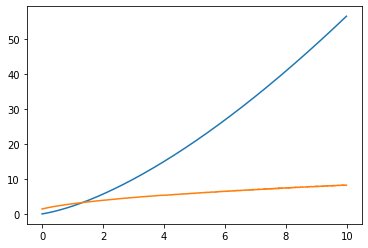

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.01)

plt.plot(x, f1_1(x),
         x, gradient(f1_1, x))
plt.show()

$$y = \frac{2x-1}{x+2}$$

In [ ]:
def f1_2(x):
    return (2*x - 1)/(x + 2)
    
gradient(f1_2, 2.0)

0.3141931159689193

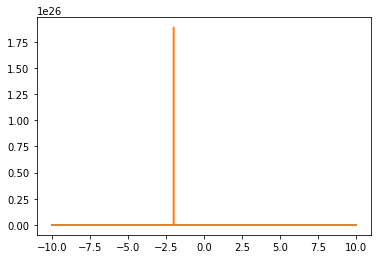

In [ ]:
x = np.arange(-10, 10, 0.01)

plt.plot(x, f1_2(x),
         x, gradient(f1_2, x))
plt.show()

$$ y = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

In [ ]:
import numpy as np

def f1_3(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

gradient(f1_3, 2.0)

0.07065070750655877

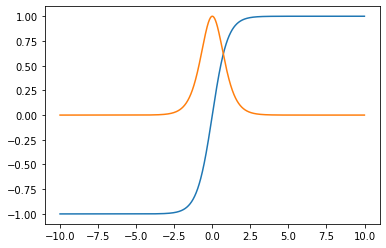

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.01)

plt.plot(x, f1_3(x),
         x, gradient(f1_3, x))
plt.show()

$$ y = \frac{1}{1 + e^{-x}} $$

In [ ]:
def f1_4(x):
    return 1 / (1+np.exp(-x))
x = 2
d = 1.0e-13

In [ ]:
print(gradient(f1_4, 2)) # Đạo hàm cấp 1
print((gradient(f1_4, x + d/2) - gradient(f1_4, x - d/2)) / d) # Đạo hàm cấp 2

0.10436096431476471
44408920985.00626


# III. Dual Numbers

$$f(x)=f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2+...$$

$$f(x_0 +\varepsilon )=f(x_0) + \frac{f'(x_0)}{1!}\varepsilon + \frac{f''(x_0)}{2!}\varepsilon^2+...
$$

$$f(x_0 +\varepsilon )=f(x_0) + f'(x_0)\varepsilon $$

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 24 12:46:30 2021

@author: Quang Van
"""

import numpy as np

class DualNumber:
    def __init__(self, value, prime):
        self.value = value
        self.prime = prime

    def __add__(self, other):
        
        if not isinstance(other, DualNumber):
            other = DualNumber(other, 0)
            
        return DualNumber(self.value + other.value,
                              self.prime + other.prime)
    
    def __radd__(self, other):
        return DualNumber(other, 0) + self


    def __sub__(self, other):
        
        if not isinstance(other, DualNumber):
            other = DualNumber(other, 0)
            
        return DualNumber(self.value - other.value,
                              self.prime - other.prime)

    def __rsub__(self, other):
        return DualNumber(other, 0) - self


    def __mul__(self, other):
        if not isinstance(other, DualNumber):
            other = DualNumber(other, 0)
            
        return DualNumber(self.value * other.value,
                              self.value * other.prime + self.prime * other.value)
    def __rmul__(self, other):
        return DualNumber(other, 0) * self


    def __truediv__(self, other):
        if not isinstance(other, DualNumber):
            other = DualNumber(other, 0)
        
        return DualNumber(self.value/other.value,
                              (self.prime*other.value - 
                               self.value*other.prime)/(other.value**2))

    def __rtruediv__(self, other):
        return DualNumber(other, 0) / self
    
    def __pow__(self, other):
        
        if not isinstance(other, DualNumber):
            other = DualNumber(other, 0)
            
        return DualNumber(self.value**other.value,
                          self.value**other.value * (
                          other.prime*np.log(self.value) + 
                          + other.value * self.prime * 1.0/self.value
                          ))

    def __repr__(self):
        return repr(self.value) + ' + ' + repr(self.prime) + '*epsilon'
    
    def __neg__(self):
        return DualNumber(-self.value, -self.prime)
    
    def __pos__(self):
        return DualNumber(self.value, self.prime)


def func(f):    
    
    def fdeclare(dark):
        if not isinstance(dark, DualNumber):
            def wrapper(x):
                return f(dark(x))
            return wrapper
        
        return f(dark)
    
    return fdeclare 


@func
def exp(x):
    return DualNumber(np.exp(x.value),
                      x.prime * np.exp(x.value))
@func
def sin(x):
    return DualNumber(np.sin(x.value),
                      x.prime * np.cos(x.value))
@func
def cos(x):
    return DualNumber(np.cos(x.value),
                      -x.prime * np.sin(x.value))  
@func
def tan(x):
    return DualNumber(np.tan(x.value),
                      x.prime/np.cos(x.value)**2)
@func
def log(x):
    return DualNumber(np.log(x.value),
                      x.prime*(1.0/x.value))
@func
def pow(x, n):
    return DualNumber(x.value**n,
                      x.prime*n*(x.value**(n-1)))
@func
def fabs(x):
    return DualNumber(np.abs(x.value),
                      x.value/(x.value**2)**0.5)
@func
def fsum(x, axis=None, dtype=None, keepdims=np._NoValue):
    return DualNumber(np.sum(x.value, axis=axis, dtype=dtype, keepdims=keepdims),
                      x.prime)

def auto_diff(f, x):

    if isinstance(x, int):
        x = [x]
        
    x = np.array(x, dtype=np.float64)
    
    return f(DualNumber(x, np.ones(x.shape))).prime



In [ ]:
def f(x):
    return x**(9*log(x))
    
auto_diff(f, 2.0)

470.9673551802704

In [ ]:
def f(x):
    return x**(log(x))
    
auto_diff(f, 2.0)

1.1206849863748245

In [ ]:
def f(x):
    return log(1 + exp(x))
    
auto_diff(f, 2.0)

0.8807970779778824

In [ ]:
def f(x):
    return fsum(x**2)
    
auto_diff(f, [2.0, 3, 5])

array([ 4.,  6., 10.])

In [ ]:
def f(x):
    return x*(3*x+2)**(1/2)
    
auto_diff(f, [2.0])

array([3.8890873])

# IV. Ứng dụng

## Tìm nghiệm của phương trình

https://colab.research.google.com/drive/1R7nshsTvCFS4fndbXZrXkOFO9UwIsJJt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def d_f(f, x, epsilon=1.0e-7):
    return (f(x + epsilon/2)
            - f(x - epsilon/2))/epsilon

---

![image.png](attachment:2a55a9b2-8b74-4e66-9471-f842feb8f91b.png)

In [ ]:
#https://toanmath.com/2018/09/cach-giai-phuong-trinh-bac-4.html
def f(x):
    return (x+4)*(x+6)*(x-2)*(x-12)-25*(x**2)

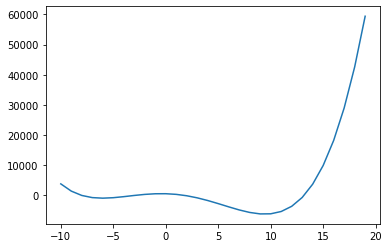

In [ ]:
x = np.arange(-10, 20, 1)
plt.plot(x, f(x))

In [ ]:
epochs = 1000
x = 9
for _ in range(epochs):
    x = x - f(x)/d_f(f, x)
print(x)

-8.0


![image.png](attachment:e0610b09-ccbf-4db3-97b6-460615a68fbf.png)

In [ ]:
#https://toanmath.com/2018/09/cach-giai-phuong-trinh-bac-4.html
def f(x):
    return x**4-8*(x**3)+21*(x**2)-24*x+9

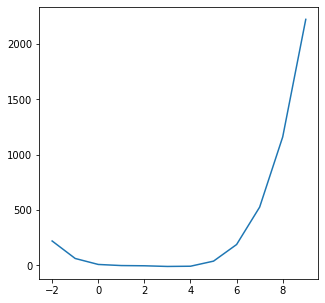

In [ ]:
x = np.arange(-2, 10, 1)
plt.figure(figsize=(5,5))
plt.plot(x, f(x))

In [ ]:
epochs = 1000
x = 2
for _ in range(epochs):
    x = x - f(x)/d_f(f, x)
print(x)

0.6972243622680052


In [ ]:
(5-(13**(0.5)))/2

0.6972243622680054

## Optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# From scratch
def d_vec_to_vec(f, w, epsilon=1e-7):
    result = []
    w = np.array(w, dtype=np.float64).reshape(-1, 1)
    for i in range(w.shape[0]):
        w_t = w.copy()
        w_p = w.copy()
        w_t[i] += epsilon/2
        w_p[i] -= epsilon/2
        result.append((f(w_t) - f(w_p))/epsilon)
    return np.concatenate(result, -1)

$z=2x^4+y^4-4x^2+2y^2$

In [ ]:
#http://theza2.mobie.in/goc-hoc-tap/giai-tich-I/cuc-tri-ham-2-bien
def f1(w):
    x,y = w
    return 2*(x**4) + y**4 - 4*(x**2) + 2*(y**2)

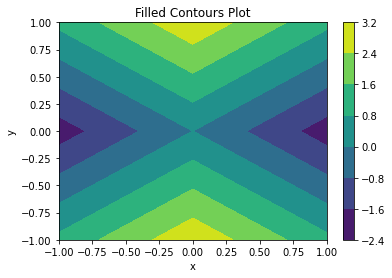

In [ ]:
xmin, xmax, xstep = -1, 1, 1
ymin, ymax, ystep = -1, 1, 1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f1([x, y])

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

min = -2.0 with x,y=(0.9999999997511617, 1.5609557049711675e-11)


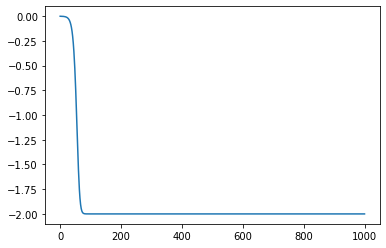

In [ ]:
x = 0.01
y = 0.01
lr = 0.01
epoch = 1000
f_val = []
for _ in range(epoch):
    z = f1([x,y])
    dx, dy = d_vec_to_vec(f1, [x,y])
    x -= dx*lr
    y -= dy*lr
    f_val.append(z)
plt.plot(f_val)
print(f"min = {f_val[-1]} with x,y={x,y}")

$z = 2x^2+3y^2-e^{-(x^2+y^2)}$

In [ ]:
#http://theza2.mobie.in/goc-hoc-tap/giai-tich-I/cuc-tri-ham-2-bien
def f2(w):
    x, y = w
    return 2*(x**3) + 3*(y**2) - np.exp(-(x**2+y**2))

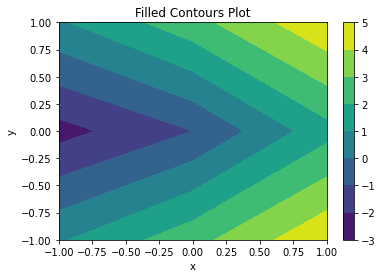

In [ ]:
xmin, xmax, xstep = -1, 1, 1
ymin, ymax, ystep = -1, 1, 1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f2([x, y])

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

min = -1.0 with x,y=(5.763158839044991e-10, 4.551026222543442e-12)


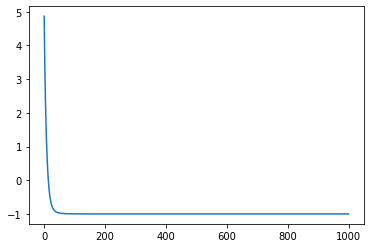

In [ ]:
x = 1.0
y = 1.0
lr = 0.01
epoch = 1000
f_val = []
for _ in range(epoch):
    z = f2([x,y])
    dx, dy = d_vec_to_vec(f2, [x,y])
    x -= dx*lr
    y -= dy*lr
    f_val.append(z)
plt.plot(f_val)
print(f"min = {f_val[-1]} with x,y={x,y}")

## Optimization loss function (eg. Linear regression)

> data (advertising.csv): https://drive.google.com/file/d/1joUbtLNSTmXc_fyuW2f9Af1Y0RPNSB6I/view?usp=sharing

> data (BostonHousing.csv): https://drive.google.com/file/d/18Nh-Vh1QJmFA0DWeEYr163svN6ABm-TN/view?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# From scratch
def d_vec_to_vec(f, w, epsilon=1e-7):
    result = []
    w = np.array(w, dtype=np.float64).reshape(-1, 1)
    for i in range(w.shape[0]):
        w_t = w.copy()
        w_p = w.copy()
        w_t[i] += epsilon/2
        w_p[i] -= epsilon/2
        result.append((f(w_t) - f(w_p))/epsilon)
    return np.concatenate(result, -1)

In [ ]:
data = np.genfromtxt("BostonHousing.csv", delimiter=',', skip_header=True)

In [ ]:
x = data[:, :-1]
y = data[:, -1:]

In [ ]:
n_sample, n_features = x.shape # Lấy số sample, và số features

In [ ]:
x.shape

(406, 13)

In [ ]:
x = (x - x.mean())/x.std()

In [ ]:
x = np.concatenate((x, np.ones((n_sample, 1))), axis = 1) # Thêm cột 1 vào x

In [ ]:
def linear(x):
    def handle(w):
        return x@w
    return handle

In [ ]:
def mean_square_error(const):
    def handle(w):
        return np.mean((const-w)**2, keepdims=True)
    return handle

In [ ]:
# init parameters (weight, learning_rate, epoch, batch_size)
w = np.random.rand(n_features + 1, 1)
learning_rate = 0.01
batch_size = n_sample
n_epochs = 100


#for debug
losses = []

In [ ]:
# Tìm w, b
for epoch in range(n_epochs):
    
    # May be shufle

    for i in range(0, n_sample, batch_size):

        # pick sample
        xi = x[i:batch_size, :]
        yi = y[i:batch_size]
        

        # predict
        y_pred = linear(xi)(w)
        
        # loss (debug)
        l = mean_square_error(yi)(y_pred)
        losses.append(l.mean())

        # compute gradient (d_weight)
        dl_dy = d_vec_to_vec(mean_square_error(yi), y_pred)
        dy_dw = d_vec_to_vec(linear(x), w)
        d_lw = (dl_dy @ dy_dw).T
        
        # Update weight
        w = w - learning_rate*d_lw


In [ ]:
i = 0

In [ ]:
# pick sample
xi = x[i:batch_size, :]
yi = y[i:batch_size]

In [ ]:
# predict
y_pred = linear(xi)(w)

# loss (debug)
l = mean_square_error(yi)(y_pred)
losses.append(l.mean())

# # compute gradient (d_weight)
# dl_dy = d_vec_to_vec(mean_square_error(yi), y_pred)
# dy_dw = d_vec_to_vec(linear(x), w)

In [ ]:
l

array([[495.32112476]])

In [ ]:
d_vec_to_vec(mean_square_error(yi), y_pred).shape

(1, 406)

In [ ]:
d_vec_to_vec(linear(x), w).shape

(406, 14)

In [ ]:

        


        d_lw = (dl_dy @ dy_dw).T
        
        # Update weight
        w = w - learning_rate*d_lw

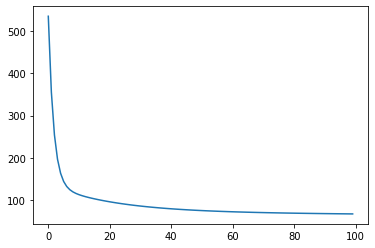

In [ ]:
plt.plot(losses)

In [ ]:
# test
np.abs(y - linear(x)(w)).mean()

5.896487793000659

In [ ]:
for i, j in zip(y, linear(x)(w)):
    print(i, ":", j)

[13.] : [18.11180831]
[18.9] : [23.5822089]
[22.] : [23.82195737]
[21.2] : [23.03726939]
[19.4] : [16.99011315]
[18.6] : [8.29803266]
[32.2] : [24.0483179]
[21.1] : [24.04621577]
[43.1] : [23.5118085]
[19.7] : [23.90616839]
[21.7] : [23.49958451]
[22.2] : [22.72252789]
[22.] : [23.77921914]
[19.6] : [23.46260134]
[23.3] : [23.64573308]
[18.9] : [23.84834198]
[19.6] : [22.49430398]
[21.4] : [21.81386356]
[15.1] : [22.36789541]
[25.] : [23.7161087]
[31.6] : [23.99246938]
[33.4] : [24.02389826]
[24.4] : [23.044391]
[19.5] : [24.00602688]
[44.8] : [23.2213867]
[20.5] : [22.71943253]
[18.9] : [23.70183348]
[19.5] : [23.34075553]
[21.7] : [23.49156875]
[24.8] : [22.99876047]
[15.2] : [22.51582414]
[50.] : [23.08076044]
[12.7] : [4.43841658]
[36.2] : [24.08565377]
[14.1] : [7.66213707]
[23.1] : [23.42135419]
[15.] : [22.35305247]
[23.] : [22.62675804]
[25.] : [21.57148431]
[19.6] : [23.23918814]
[29.6] : [23.59761415]
[19.8] : [23.6913652]
[14.] : [22.7395075]
[18.9] : [23.17869474]
[28.5] : 

In [ ]:
# Tìm w, b
for epoch in range(n_epochs):
    
    # May be shufle

    for i in range(0, n_sample, batch_size):

        # pick sample
        x_i = x[i:i+batch_size, :]
        y_i = y[i:i+batch_size]

        # predict
        y_pred = linear(x_i)(w)
        
        # loss (debug)
        l = mean_square_error(y_i)(y_pred) # np.abs(o - y_i)
        losses.extend(l)

        # compute gradient (d_weight)
        dw = (d_vec_to_vec(mean_square_error(y_i), y_pred) @ d_vec_to_vec(linear(x_i), w)).T
        
        # Update weight
        w = w - learning_rate*dw      


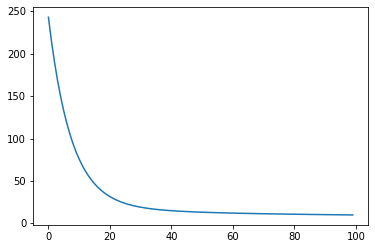

In [ ]:
plt.plot(losses);

In [ ]:
# Evaluate
np.abs(x.dot(w) - y).mean()

2.517039010286411